In [1]:
#model 1
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
torch.device('mps')
# Load cleaned data
df = pd.read_csv("/kaggle/input/questionnaire-data/clean_questionnaire_data.csv")  # You can save the `clean_df` we just made
X = df.drop(columns=["target"]).values
y = df["target"].values

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define neural network
class QuestionnaireNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = QuestionnaireNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/50], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor).round()
    print(classification_report(y_test_tensor, preds))

# Evaluation on Training Set
model.eval()
with torch.no_grad():
    train_preds = model(X_train_tensor).round()
    print("Training Set Evaluation:")
    print(classification_report(y_train_tensor, train_preds))



Epoch [10/50], Loss: 0.6118
Epoch [20/50], Loss: 0.5441
Epoch [30/50], Loss: 0.5004
Epoch [40/50], Loss: 0.4360
Epoch [50/50], Loss: 0.3900
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72        35
         1.0       0.82      0.86      0.84        59

    accuracy                           0.80        94
   macro avg       0.79      0.78      0.78        94
weighted avg       0.80      0.80      0.80        94

Training Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       158
         1.0       0.86      0.86      0.86       217

    accuracy                           0.84       375
   macro avg       0.83      0.83      0.83       375
weighted avg       0.84      0.84      0.84       375



Epoch 1/100 | Train Loss: 0.7069 | Train Acc: 0.3772 | Val Loss: 0.6916 | Val Acc: 0.5532
Epoch 2/100 | Train Loss: 0.6970 | Train Acc: 0.4520 | Val Loss: 0.6842 | Val Acc: 0.6489
Epoch 3/100 | Train Loss: 0.6855 | Train Acc: 0.5445 | Val Loss: 0.6777 | Val Acc: 0.6489
Epoch 4/100 | Train Loss: 0.6737 | Train Acc: 0.6192 | Val Loss: 0.6720 | Val Acc: 0.6489
Epoch 5/100 | Train Loss: 0.6673 | Train Acc: 0.6548 | Val Loss: 0.6665 | Val Acc: 0.6489
Epoch 6/100 | Train Loss: 0.6556 | Train Acc: 0.6726 | Val Loss: 0.6615 | Val Acc: 0.6383
Epoch 7/100 | Train Loss: 0.6477 | Train Acc: 0.6975 | Val Loss: 0.6568 | Val Acc: 0.6383
Epoch 8/100 | Train Loss: 0.6394 | Train Acc: 0.6975 | Val Loss: 0.6524 | Val Acc: 0.6489
Epoch 9/100 | Train Loss: 0.6338 | Train Acc: 0.7117 | Val Loss: 0.6482 | Val Acc: 0.6596
Epoch 10/100 | Train Loss: 0.6259 | Train Acc: 0.7295 | Val Loss: 0.6442 | Val Acc: 0.6702
Epoch 11/100 | Train Loss: 0.6149 | Train Acc: 0.7189 | Val Loss: 0.6406 | Val Acc: 0.6596
Epoch 12

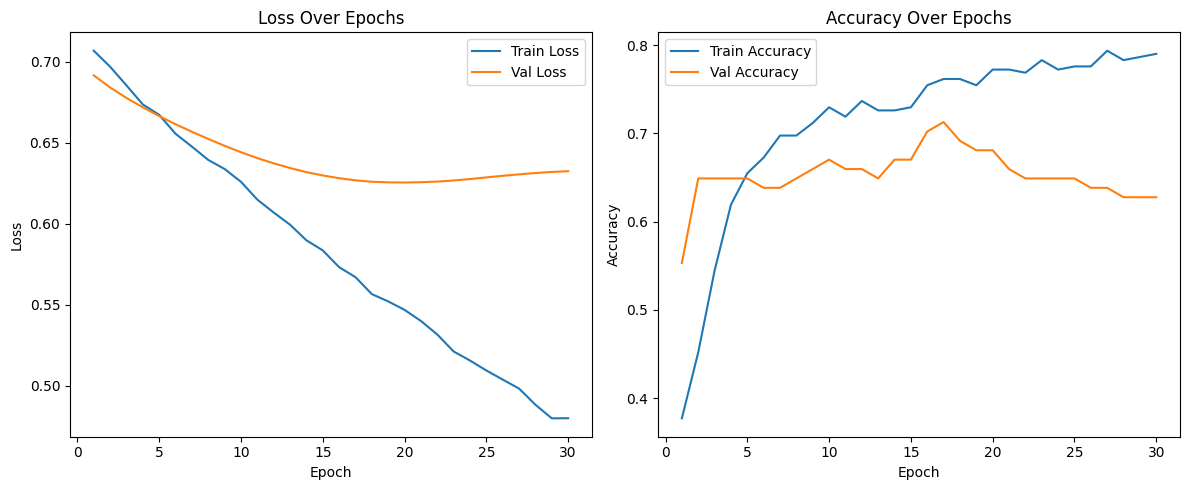

Training Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75       121
         1.0       0.79      0.88      0.83       160

    accuracy                           0.80       281
   macro avg       0.80      0.79      0.79       281
weighted avg       0.80      0.80      0.80       281



In [2]:
#model 3
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("/kaggle/input/questionnaire-data/clean_questionnaire_data.csv")
X = df.drop(columns=["target"]).values
y = df["target"].values

# Split into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define combined neural network (Model 1 architecture + Model 2 logic)
class QuestionnaireNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize model, loss, optimizer
model = QuestionnaireNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training settings
num_epochs = 100
early_stop_patience = 10
best_val_loss = np.inf
epochs_no_improve = 0

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Compute train accuracy
    train_preds = outputs.round()
    train_acc = (train_preds == y_train_tensor).float().mean().item()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_preds = val_outputs.round()
        val_acc = (val_preds == y_val_tensor).float().mean().item()

    # Save metrics
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss.item():.4f} | Val Acc: {val_acc:.4f}")

    # Early stopping logic
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        epochs_no_improve = 0
        best_model_state = model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stop_patience:
            print(f"\nEarly stopping at epoch {epoch+1}")
            model.load_state_dict(best_model_state)
            break

# Final Evaluation on Test Set
model.eval()
with torch.no_grad():
    test_preds = model(X_test_tensor).round()
    print("\nTest Set Evaluation:")
    print(classification_report(y_test_tensor.numpy(), test_preds.numpy()))

# Plot loss and accuracy over epochs
epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
plt.plot(epochs_range, val_accuracies, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation on Training Set
model.eval()
with torch.no_grad():
    train_preds = model(X_train_tensor).round()
    print("Training Set Evaluation:")
    print(classification_report(y_train_tensor, train_preds))
